In [1]:
from pygam import*
from pygam.datasets import mcycle
from pylab import*

In [3]:
X,y=mcycle()[0],mcycle()[1] #datos de choques de motocicletas donde t vs aceleracion

Un modelo aditivo genealizado es un modelo de la forma 
$$
g(\mathbb{E}(Y|X))=\alpha+f_1(X_1)+f_2(X_2)\dots f_p(X_p)
$$
donde g es la función liga, ahora ajustaremos a linear GAM  a los datos es decir la función liga es la identidad.
$$\mathbb{E}(Y|X)=\alpha+f_1(X_1)+f_2(X_2,X_3)\dots f_p(X_p)$$


In [24]:
gam=LinearGAM(n_splines=25).fit(X,y) #usamos 25-splines como base
x=gam.generate_X_grid(term=0,n=500) #ajustamos un modelo aditivo generalizado lineal

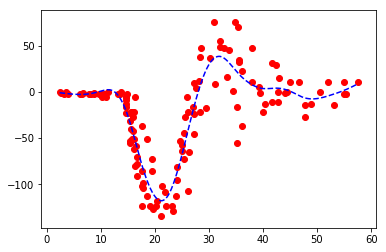

In [25]:
plot(x,gam.predict(x),'b--')
scatter(X,y,color='r')

In [29]:
from pygam import LogisticGAM,s,f
from pygam.datasets import default

Ahora lo que ajustaremos es un modelo logistico aditivo generalizado y haremos graficaremos las dependias parciales:
    $$\log(\dfrac{P(Y=1|X)}{P(Y=0|X)}=\alpha+f_1(X_1)+f_2(X_2,X_3)\dots f_p(X_p)$$

In [30]:
X,y=default()[0],default()[1]

In [31]:
gam=LogisticGAM(f(0)+s(1)+s(2)).gridsearch(X,y)

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


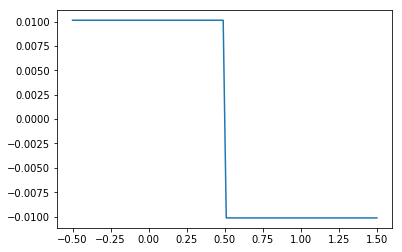

In [36]:
x=gam.generate_X_grid(term=0)
f=gam.partial_dependence(term=0)
plot(x[:,0],f)

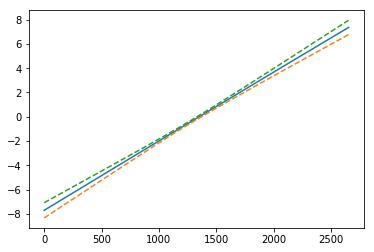

In [33]:
#intervalo de confianza al 95 por ciento
x=gam.generate_X_grid(term=1)
f,conf=gam.partial_dependence(term=1,width=0.95)
plot(x[:,1],f)
plot(x[:,1],conf,ls='--')

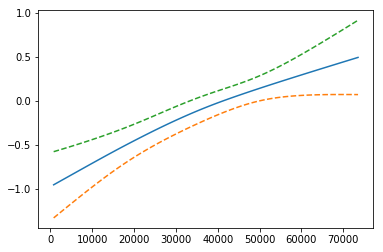

In [59]:
x=gam.generate_X_grid(term=2)
f,conf=gam.partial_dependence(term=2,width=0.95)
plot(x[:,2],f)
plot(x[:,2],conf,ls='--')

In [44]:
#resumen de estadisticos
gam.statistics_

{'AIC': 1585.3634163235515,
 'AICc': 1585.3689974430363,
 'GCV': None,
 'UBRE': 2.1588407142925714,
 'cov': array([[ 1.27876597e-05, -1.27876597e-05, -3.28997021e-05, ...,
         -1.74981567e-04, -2.12725096e-04, -6.79111841e-05],
        [-1.27876597e-05,  1.27876597e-05,  3.28997024e-05, ...,
          1.74981567e-04,  2.12725096e-04,  6.79111842e-05],
        [-3.28997021e-05,  3.28997024e-05,  1.29098820e-01, ...,
         -9.82172343e-03, -1.09401956e-02,  2.42381144e-02],
        ...,
        [-1.74981567e-04,  1.74981567e-04, -9.82172343e-03, ...,
          4.62837636e-02,  5.33269894e-02,  7.19174978e-03],
        [-2.12725096e-04,  2.12725096e-04, -1.09401956e-02, ...,
          5.33269894e-02,  6.16007748e-02,  8.58367794e-03],
        [-6.79111841e-05,  6.79111842e-05,  2.42381144e-02, ...,
          7.19174978e-03,  8.58367794e-03,  1.13741419e-02]]),
 'deviance': 1577.7540998181503,
 'edof': 3.804658252700564,
 'edof_per_coef': array([8.90060734e-01, 8.24125039e-01, 4.30